#Using FFT for Matrices

In [0]:
import numpy as np
import scipy.fftpack
import math
import matplotlib.pyplot as plt

In [0]:
# using the matlib library
import numpy.matlib

# generate multivariate dataset

srate = 400
time  = np.arange(0,srate*2)/srate
npnts = len(time)
nreps = 50

# dataset is repeated sine waves
data = np.matlib.repmat( np.sin(2*np.pi*10*time), nreps,1 )

In [8]:
# FFT of data along each dimension

dataX1 = scipy.fftpack.fft(data,axis=0) / npnts
dataX2 = scipy.fftpack.fft(data,axis=1) / npnts
hz = np.linspace(0,srate/2,int(np.floor(npnts/2))+1)

# check sizes
print(np.shape(dataX1))
print(np.shape(dataX2))

(50, 800)
(50, 800)


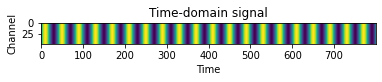

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


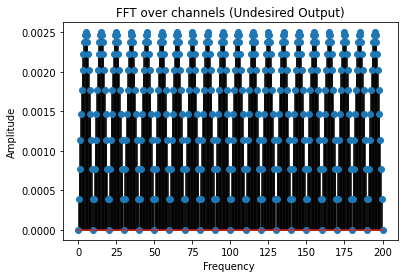

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


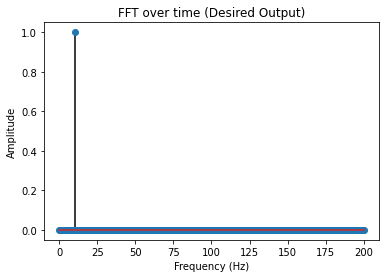

In [10]:
# show data and spectra!
plt.imshow(data)
plt.xlabel('Time')
plt.ylabel('Channel')
plt.title('Time-domain signal')
plt.show()

plt.stem(hz,np.mean( 2*abs(dataX1[:,:len(hz)]),axis=0),'k')
plt.xlabel('Frequency ')
plt.ylabel('Amplitude')
plt.title('FFT over channels (Undesired Output)')
plt.show()

plt.stem(hz,np.mean( 2*abs(dataX2[:,:len(hz)]),axis=0),'k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT over time (Desired Output)')
plt.show()